In [1]:
import pandas as pd

from constants import *
from phe import *

In [7]:
data, data_date = best_data(area_type=nation)
data[unique_people_tested_sum] = data[unique_people_tested_sum]
data = with_population(data, source_cols=[unique_people_tested_sum], factors=[100])
data.set_index('date', inplace=True)
data_date

datetime.date(2020, 12, 29)

Text(0, 0.5, '% people testing positive')

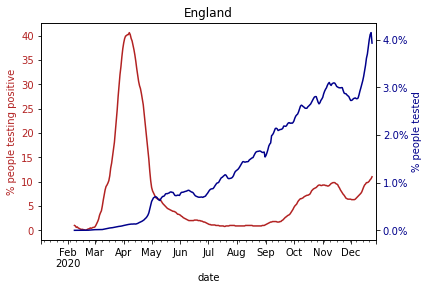

In [9]:
area_data = data[(data[area_code] == 'E92000001')]
name, = area_data[area_name].unique()
pos_col = 'firebrick'
tests_col = 'darkblue'
pos_ax = area_data[unique_cases_positivity_sum].plot(color=pos_col, title=name)
tests_ax = pos_ax.twinx()
tests_ax.tick_params(axis='y', labelcolor=tests_col)
tests_ax.set_ylabel('% people tested', color=tests_col)
tests_ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}%'))
area_data[per100k].plot(ax=tests_ax, color=tests_col)

pos_ax.tick_params(axis='y', labelcolor=pos_col)
pos_ax.set_ylabel('% people testing positive', color=pos_col)
